In [93]:
import quandl
quandl.ApiConfig.api_key = "j67RxzNn-SsKeba2KazR"

In [94]:
crude_oil_price = quandl.get("EIA/PET_RWTC_D")
WTI_futures_price=quandl.get("CHRIS/ICE_T1")
# USDX=quandl.get("CHRIS/ICE_DX1")
USDX_wt=quandl.get("FRED/DTWEXB")
# DJIA=quandl.get("BCB/UDJIAD1")
DJIA2=quandl.get("BCB/7809")
WTI_futures_price.drop(['Open', 'High', 'Low', 'Change', 'Wave', 'Volume',
       'Prev. Day Open Interest', 'EFP Volume', 'EFS Volume', 'Block Volume'],axis=1,inplace=True)

In [95]:
crude_oil_price.columns=['CrudePrice']
USDX_wt.columns=['USDX']
WTI_futures_price.columns=['WTI_FUTURES']
DJIA2.columns=['DJIA']

In [96]:
Financial_data=WTI_futures_price.join(DJIA2,how='inner').join(USDX_wt,how='inner').join(crude_oil_price,how='inner')

In [97]:
Financial_data.to_csv('../Data/NewsData/CrudePrice1.csv',sep='|')

In [123]:
import pandas as pd
from datetime import date,datetime, timedelta
import matplotlib.pyplot as plt

In [99]:
def get_relevance_date(dt):
    if dt.weekday()==5:
        return(dt - timedelta(1))
    elif dt.weekday()==6:
        return(dt - timedelta(2))
    elif dt.weekday()==0:
        return(dt - timedelta(3))
    else:
        return(dt- timedelta(1))

In [164]:
to_datetime = lambda d: datetime.strptime(d, "%Y-%m-%d")
price_data=pd.read_csv('../Data/NewsData/CrudePrice1.csv',sep='|',converters={'Date': to_datetime},encoding = "ISO-8859-1")

In [157]:
from sklearn.preprocessing import StandardScaler
std_obj=StandardScaler()
std_obj.fit(price_data[['WTI_FUTURES','DJIA','USDX','CrudePrice']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [166]:
import pickle
pickle_out = open("std_scaler.pickle","wb")
pickle.dump(std_obj, pickle_out)
pickle_out.close()

In [158]:
X_std=pd.DataFrame(std_obj.transform(price_data[['WTI_FUTURES','DJIA','USDX','CrudePrice']]),columns=['WTI_FUTURES','DJIA','USDX','CrudePrice'])
X_std['Date']=price_data['Date']
price_data=X_std
del(X_std)

In [163]:
pd.DataFrame(std_obj.inverse_transform(price_data[['WTI_FUTURES','DJIA','USDX','CrudePrice']]),columns=['WTI_FUTURES','DJIA','USDX','CrudePrice'])

array([[   65.37  , 10794.    ,   110.3282,    65.41  ],
       [   65.37  , 10794.    ,   110.3282,    65.41  ],
       [   65.37  , 10794.    ,   110.3282,    65.41  ],
       ...,
       [   55.91  , 26820.    ,   131.1768,    55.95  ],
       [   55.91  , 26820.    ,   131.1768,    55.95  ],
       [   54.07  , 26917.    ,   131.4406,    54.09  ]])

In [160]:
flag=True
while flag:
    d=price_data.sort_values('Date').Date.to_list()
    print('DataDate count:',len(d))
    date_set = set(d[0] + timedelta(x) for x in range((d[-1] - d[0]).days))
    print('Actual Date count:',len(date_set))
    missing = sorted(date_set - set(d))
    print('Missing Date count:',len(missing))
# print(missing)
    missing_df=pd.DataFrame(missing,columns=['Date'])
    missing_df['Agg_Col']=missing_df.Date.apply(lambda dt:get_relevance_date(dt))
    price_data=pd.concat([price_data[['Date', 'WTI_FUTURES', 'DJIA', 'USDX', 'CrudePrice']],missing_df.join(price_data.set_index('Date'),on=['Agg_Col'],how='left')[['Date', 'WTI_FUTURES', 'DJIA', 'USDX', 'CrudePrice']]],axis=0,sort=False,ignore_index=True)
    if price_data.isna().sum().sum()==0:
        flag=False
    price_data.dropna(inplace=True)
    price_data.sort_values('Date',inplace=True)
    del(missing_df)
    del(missing)
    del(date_set)
    del(d)
d=price_data.sort_values('Date').Date.to_list()
print('DataDate count:',len(d))
date_set = set(d[0] + timedelta(x) for x in range((d[-1] - d[0]).days))
print('Actual Date count:',len(date_set))
missing = sorted(date_set - set(d))
print('Missing Date count:',len(missing))

DataDate count: 3323
Actual Date count: 4987
Missing Date count: 1665
DataDate count: 4871
Actual Date count: 4987
Missing Date count: 117
DataDate count: 4977
Actual Date count: 4987
Missing Date count: 11
DataDate count: 4987
Actual Date count: 4987
Missing Date count: 1
DataDate count: 4988
Actual Date count: 4987
Missing Date count: 0


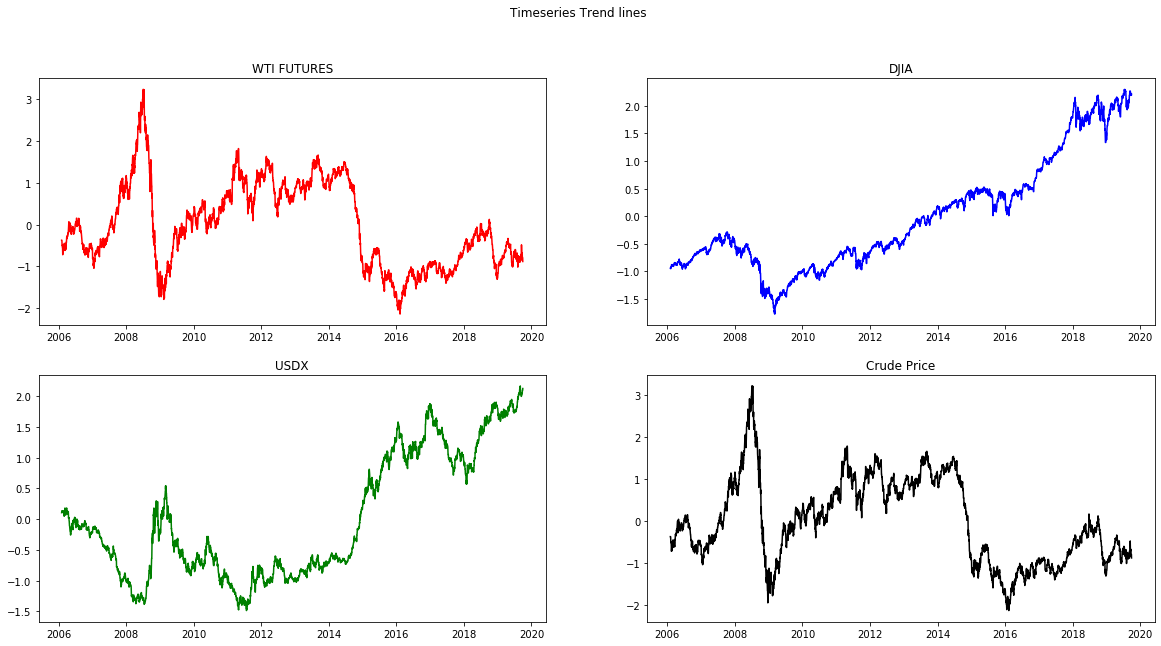

In [161]:
myfig=plt.figure(figsize=(20,10))
myfig.suptitle("Timeseries Trend lines")
(plt1,plt2),(plt3,plt4)=myfig.subplots(nrows=2,ncols=2)
plt1.set_title('WTI FUTURES')
plt2.set_title('DJIA')
plt3.set_title('USDX')
plt4.set_title('Crude Price')
plt1.plot(price_data.Date, price_data.WTI_FUTURES,'red')
plt2.plot(price_data.Date,price_data.DJIA,'blue')
plt3.plot(price_data.Date,price_data.USDX,'green')
plt4.plot(price_data.Date,price_data.CrudePrice,'black')

In [114]:
smoothed=price_data.rolling(window=5).mean()
smoothed['Date']=price_data.Date
smoothed.dropna(inplace=True)

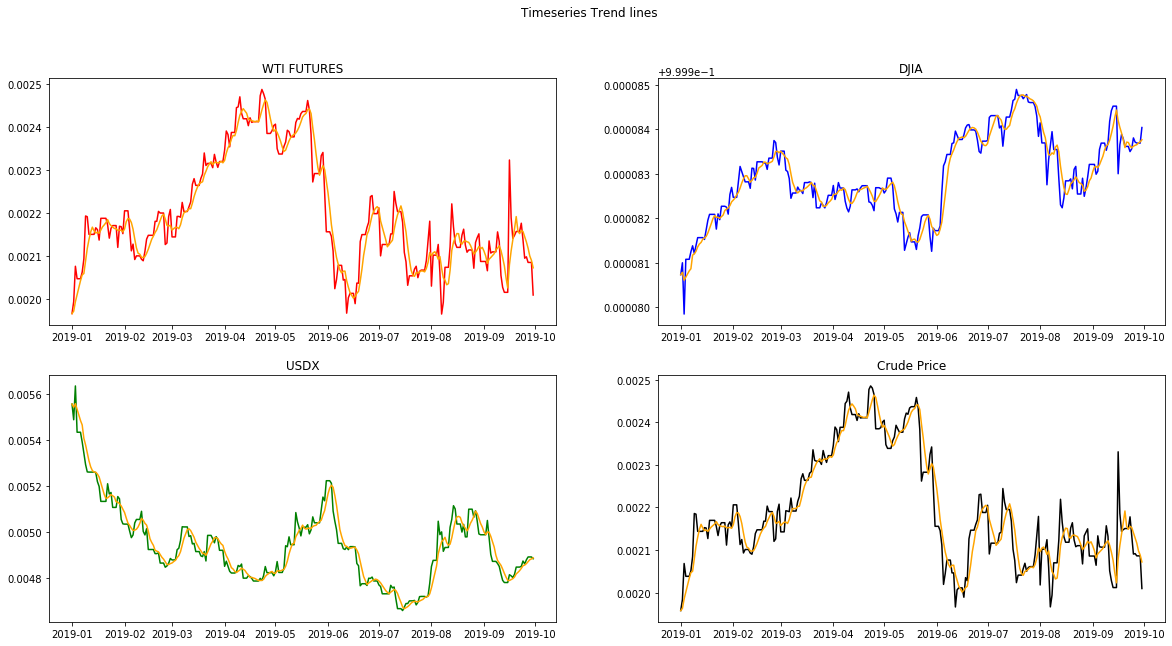

In [115]:
myfig=plt.figure(figsize=(20,10))
myfig.suptitle("Timeseries Trend lines")
(plt1,plt2),(plt3,plt4)=myfig.subplots(nrows=2,ncols=2)
plt1.set_title('WTI FUTURES')
plt2.set_title('DJIA')
plt3.set_title('USDX')
plt4.set_title('Crude Price')
smoothedplt=smoothed
price_dataplt=price_data
smoothedplt=smoothed[smoothed.Date.between('01-Jan-2019','31-Dec-2019',inclusive=True)]
price_dataplt=price_data[price_data.Date.between('01-Jan-2019','31-Dec-2019',inclusive=True)]
plt1.plot(price_dataplt.Date, price_dataplt.WTI_FUTURES,'red')
plt2.plot(price_dataplt.Date,price_dataplt.DJIA,'blue')
plt3.plot(price_dataplt.Date,price_dataplt.USDX,'green')
plt4.plot(price_dataplt.Date,price_dataplt.CrudePrice,'black')
plt1.plot(smoothedplt.Date, smoothedplt.WTI_FUTURES,'orange')
plt2.plot(smoothedplt.Date,smoothedplt.DJIA,'orange')
plt3.plot(smoothedplt.Date,smoothedplt.USDX,'orange')
plt4.plot(smoothedplt.Date,smoothedplt.CrudePrice,'orange')

In [116]:
import statsmodels.api as sm
hpfiltered=price_data
# lmda=1600*3**4
# lmda=1600

lmda=6.25
wtif_cycle, wtif_trend = sm.tsa.filters.hpfilter(hpfiltered.WTI_FUTURES, lmda)
# hpfiltered=price_data[['Date','WTI_FUTURES']]
hpfiltered['wtif_cycle']=wtif_cycle
hpfiltered['wtif_trend']=wtif_trend
DJIA_cycle, DJIA_trend = sm.tsa.filters.hpfilter(hpfiltered.DJIA, lmda)
# hpfiltered=price_data[['Date','WTI_FUTURES']]
hpfiltered['DJIA_cycle']=DJIA_cycle
hpfiltered['DJIA_trend']=DJIA_trend
USDX_cycle, USDX_trend = sm.tsa.filters.hpfilter(hpfiltered.USDX, lmda)
# hpfiltered=price_data[['Date','WTI_FUTURES']]
hpfiltered['USDX_cycle']=USDX_cycle
hpfiltered['USDX_trend']=USDX_trend
CP_cycle, CP_trend = sm.tsa.filters.hpfilter(hpfiltered.CrudePrice, lmda)
# hpfiltered=price_data[['Date','WTI_FUTURES']]
hpfiltered['CP_cycle']=CP_cycle
hpfiltered['CP_trend']=CP_trend

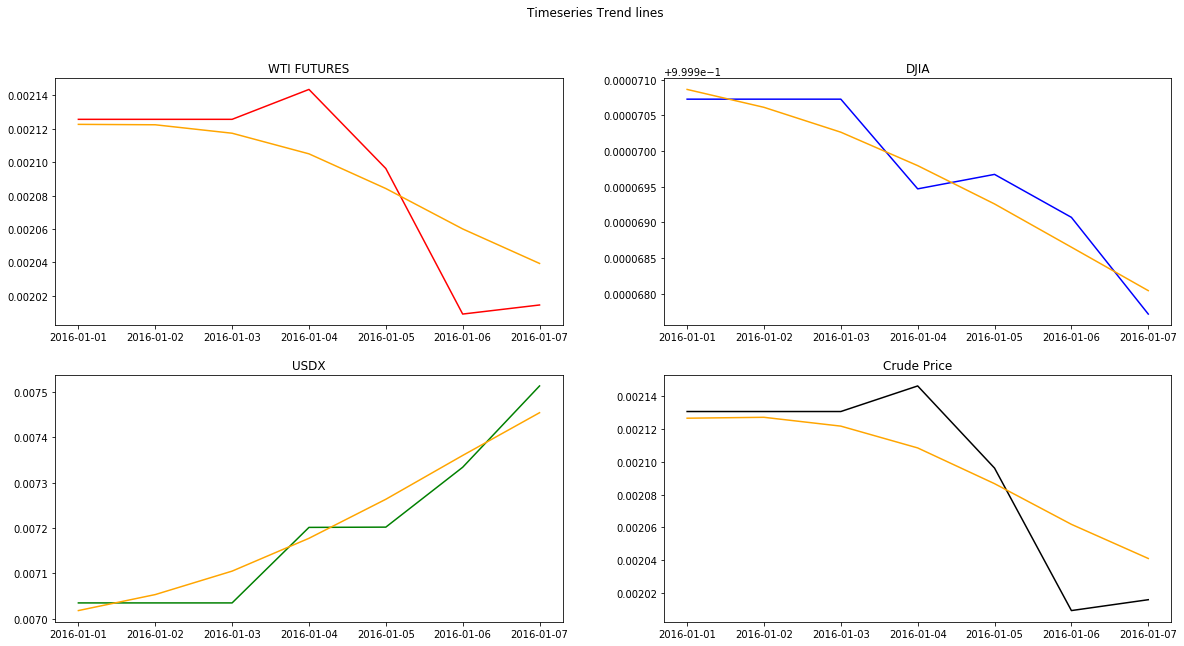

In [119]:
myfig=plt.figure(figsize=(20,10))
myfig.suptitle("Timeseries Trend lines")
(plt1,plt2),(plt3,plt4)=myfig.subplots(nrows=2,ncols=2)
plt1.set_title('WTI FUTURES')
plt2.set_title('DJIA')
plt3.set_title('USDX')
plt4.set_title('Crude Price')
# hpfilteredplt=hpfiltered
hpfilteredplt=hpfiltered[hpfiltered.Date.between('01-Jan-2016','07-Jan-2016',inclusive=True)]
plt1.plot(hpfilteredplt.Date, hpfilteredplt.WTI_FUTURES,'red')
plt1.plot(hpfilteredplt.Date, hpfilteredplt.wtif_trend,'orange')
plt2.plot(hpfilteredplt.Date,hpfilteredplt.DJIA,'blue')
plt2.plot(hpfilteredplt.Date,hpfilteredplt.DJIA_trend,'orange')
plt3.plot(hpfilteredplt.Date,hpfilteredplt.USDX,'green')
plt3.plot(hpfilteredplt.Date,hpfilteredplt.USDX_trend,'orange')
plt4.plot(hpfilteredplt.Date,hpfilteredplt.CrudePrice,'black')
plt4.plot(hpfilteredplt.Date,hpfilteredplt.CP_trend,'orange')

In [120]:
hpfiltered[['Date','wtif_trend','DJIA_trend','USDX_trend','CP_trend']].to_csv('../Data/NewsData/CrudePriceSmoothened.csv',sep='|',index=False)